# Predicting Online Shopper's Purchase Intentions
 - This notebook aims to predict purchase intentions of online shoppers using Logistic Regression, Random Forest, Decision Tree, MLP, SVC, and XGBoost models. We also compare our results with findings from the paper by Sakar et al. (2018), which utilized advanced techniques like MLP and LSTM.

## Reference Paper
 - Sakar, C.O., Polat, S.O., Katircioglu, M., & Kastro, Y. (2018). Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Computing and Applications, 31, 6893 - 6908.
_Paper Link:_ https://link.springer.com/article/10.1007/s00521-018-3523-0 

## Objectives
- Build interpretable models for predicting purchase intentions.
- Compare different model performance and comparing with the literature for evaluation.
- Provide actionable insights for optimizing e-commerce conversions.


# Dataset details.
_Dataset Link:_ https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset 

### Information on the dataset.
 - The dataset captures detailed information from 12,330 unique user sessions recorded over the course of a year. To maintain fairness and avoid skewed results, each session is tied to a different user, ensuring it isn't influenced by specific marketing campaigns, special occasions, individual browsing habits, or seasonal trends. With a mix of 10 numerical and 8 categorical features, the data provides a comprehensive picture of user behavior and session dynamics on an e-commerce platform. It includes details like how many pages a user visited, how long they stayed, and key web analytics like Bounce Rate and Exit Rate. It also considers contextual factors, such as whether the session was near a holiday or if the visitor was returning to the site. The aim of this dataset is to predict the 'Revenue' outcome, a simple yes-or-no indicator of whether the user made a purchase during their session. 
 - We will analyze the class distribution to understand potential imbalances and their implications for model evaluation. Features and their importance will also be explored.

### Features of the Dataset
 - Administrative: Number of administrative pages visited in the session.
 - Administrative Duration: Total time spent on administrative pages during the session.
 - Informational: Number of informational pages visited in the session.
 - Informational Duration: Total time spent on informational pages during the session.
 - Product Related: Number of product-related pages visited in the session.
 - Product Related Duration: Total time spent on product-related pages during the session.
 - Bounce Rate: Percentage of visitors who leave the site from the entrance page without further interaction.
 - Exit Rate: Percentage of pageviews where the page was the last in the session.
 - Page Value: Average value of a page visited before completing an e-commerce transaction.
 - Special Day: Proximity of the session date to a special day like Valentine's Day or Mother's Day.
 - Operating System: The operating system used by the visitor.
 - Browser: The browser used by the visitor.
 - Region: Geographic region of the visitor.
 - Traffic Type: The source of traffic for the session (e.g., direct, referral, search engine).
 - Visitor Type: Boolean indicating if the visitor is a returning or new visitor.
 - Weekend: Boolean indicating if the session occurred on a weekend.
 - Month: Month in which the session occurred.
 - Revenue: Target variable; Boolean indicating if the session resulted in a transaction.

## Business Model for Context
 In this project, we aim to predict whether an online shopping session will result in a purchase using various machine learning models. The performance of these models is discussed in terms of their True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

 - True Positives (TP): Sessions correctly predicted to result in a purchase.

 _Business Impact: Accurately identifying potential buyers is crucial, as it helps target users with tailored incentives or promotions to complete their purchases._

 - True Negatives (TN): Sessions correctly predicted not to result in a purchase.

 _Business Impact: It helps minimize the unnecessary allocation of marketing resources, allowing for efficient budget use._

 - False Positives (FP): Sessions incorrectly predicted to result in a purchase.

 _Business Impact: This can lead to wasted marketing resources, such as sending discount offers or advertisements to users who are unlikely to convert. This may also annoy customers with irrelevant promotions._

 - False Negatives (FN): Sessions incorrectly predicted not to result in a purchase.
 
 _Business Impact: Missing potential buyers results in a loss of revenue. These users could have been converted with proper engagement tactics, but the model failed to identify them._

### Best Metric
 - In this context, reducing **False Negatives (FN)** is highly critical, as failing to convert a user who had a genuine purchase intention results in lost revenue. However, **False Positives (FP)** should also be minimized to avoid wasting marketing resources. A good balance must be maintained between **precision and recall**, with a focus on maximizing the _**F1-score**_ to address both concerns adequately.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, make_scorer, f1_score, auc, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# MLflow imports
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

# For handling requests
import requests

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# For JSON handling
import json
# set this to the remote server (where the MLflow server is running)
MLFLOW_TRACKING_URI = 'http://131.247.92.12:5014'

import mlflow
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'shamanth21'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '860901'

In [4]:
data = pd.read_csv("C:\\Users\\Raees\\Downloads\\online+shoppers+purchasing+intention+dataset\\online_shoppers_intention.csv")

In [ ]:
# Overview of the dataset
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Checking for missing values

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Handling Categorical Variables
In this step, we identify all the categorical columns in the dataset and transform them into numerical representations using one-hot encoding.

In [17]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Categorical Columns: Index(['Month', 'VisitorType'], dtype='object')


### Splitting the Dataset and Feature Scaling
 - In this section, we prepare the dataset for model training by splitting it into training and testing sets. We use **Stratified Split** (`stratify=y`) to ensure that both sets maintain the original distribution of the target variable, `Revenue`, thereby avoiding any bias that may arise due to class imbalance. We allocate **30% of the data for testing** and use a random seed (`random_state=42`) for reproducibility. After splitting, we apply **StandardScaler** to standardize the features.

### Train-Test Split Ratio: 70-30
 - In this project, we choose a 70-30 train-test split for splitting our dataset, which means 70% of the data is used for training the model, while 30% is used for testing. By using 70% for training, the model gets ample data to learn the patterns effectively, while the 30% reserved for testing provides a sizable and independent evaluation set to fairly assess the model's performance on unseen data. We want the model to have enough examples to generalize well without overfitting while also having a representative testing set to validate its predictions comprehensively. Thus, the 70-30 split strikes a good balance between training accuracy and generalization to unseen data, which is crucial for reliable prediction of online shopper's purchase intentions.


In [18]:
X = data.drop("Revenue", axis=1)
y = data["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((8631, 26), (3699, 26))

### Implementation of Stratified Split and SMOTE for Model Training
 - In this project, we have implemented **Stratified Split** to divide our dataset into training and testing sets, ensuring that both sets have the same proportion of each class as the original data. This helps the model learn from a representative distribution and allows us to evaluate it realistically.

 - We are using Stratified Split, to maintain the real data distribution during training and testing, to ensure that the model is evaluated in a way that is closer to the real-world scenario.

 - If the dataset is imbalanced (for example, more users do not make purchases compared to those who do), Stratified Split will allow the model to see this imbalance during both training and testing phases.

 - We want the model to learn on an accurate representation of user behavior, and to ensure that predictions are not overly optimistic due to synthetic data. This helps the business to realistically understand the true rate of successful conversions and the limitations in capturing those who would make purchases.

 - Additionally, we have also trained each model by applying **SMOTE (Synthetic Minority Oversampling Technique)** to the training set after the stratified split. This allows us to create synthetic samples for the minority class, which helps the models learn better from positive cases (i.e., sessions resulting in a purchase). By comparing the models trained using only stratified split with those using SMOTE, we can clearly see the impact of **oversampling the minority class** on model performance. This comparison helps us determine if the benefits of addressing class imbalance with SMOTE outweigh the risk of overfitting and whether the models with synthetic oversampling generalize better compared to those without it.

In [6]:
# Defining the experiment name
experiment_name = "Shamanth_Experiment"

# Set the experiment
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1731776981848, experiment_id='1', last_update_time=1731776981848, lifecycle_stage='active', name='Shamanth_Experiment', tags={}>

#  Model 1 - Logistic Regression

In [13]:
mlflow.sklearn.autolog()

# Create and train the model
with mlflow.start_run(run_name="Logistic Regression - Final") as run:
    param_grid_lr = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.2, 0.5, 0.8],
        'solver': ['saga']
    }

    # balanced
    grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid_lr, cv=5, scoring='f1')
    grid_search_lr.fit(X_train, y_train)

    print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
    print("Best ROC AUC score for Logistic Regression:", grid_search_lr.best_score_)

    # Best model
    best_lr_model = grid_search_lr.best_estimator_

    y_pred_lr = best_lr_model.predict(X_test)

    print("\nLogistic Regression Results after Hyperparameter Tuning:")
    print(classification_report(y_test, y_pred_lr))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
    # Get the run ID
    autolog_run_id = run.info.run_id

print(f"Autolog Run ID: {autolog_run_id}")


2024/11/17 14:23:54 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/11/17 14:24:18 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2024/11/17 14:24:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run monumental-cat-905 at: http://131.247.92.12:5014/#/experiments/1/runs/cb2c4aa2b02b4845b2cc81fc014bd035.
2024/11/17 14:24:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 14:24:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run big-stag-340 at: http://131.247.92.12:5014/#/experiments/1/runs/1031b74b067b4d18ae781b54dded8cd6.
2024/11/17 14:24:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 14:24:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run enthused-stork-473 at: http://131.247.92.12:50

Best parameters for Logistic Regression: {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC AUC score for Logistic Regression: 0.6446751425973436

Logistic Regression Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3127
        True       0.56      0.73      0.63       572

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.87      0.87      3699

ROC AUC Score: 0.8111046692354656


2024/11/17 14:24:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression - Final at: http://131.247.92.12:5014/#/experiments/1/runs/6ff75a5a2cd8439faea060ba582d263d.
2024/11/17 14:24:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


Autolog Run ID: 6ff75a5a2cd8439faea060ba582d263d


## Logistic Regression with SMOTE

In [21]:
mlflow.sklearn.autolog()

# Create and train the model
with mlflow.start_run(run_name="Logistic Regression - Final") as run:
    param_grid_lr = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.2, 0.5, 0.8],
        'solver': ['saga']
    }

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # balanced
    grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid_lr, cv=5, scoring='f1')
    grid_search_lr.fit(X_train_smote, y_train_smote)

    print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
    print("Best ROC AUC score for Logistic Regression:", grid_search_lr.best_score_)

    # Best model
    best_lr_model = grid_search_lr.best_estimator_

    y_pred_lr = best_lr_model.predict(X_test)

    print("\nLogistic Regression Results after Hyperparameter Tuning:")
    print(classification_report(y_test, y_pred_lr))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
    # Get the run ID
    autolog_run_id = run.info.run_id

print(f"Autolog Run ID: {autolog_run_id}")

2024/11/17 16:24:53 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/17 16:24:53 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/17 16:24:53 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/17 16:24:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 16:24:59 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/11/17 16:25:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
202

Best parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC AUC score for Logistic Regression: 0.8328194048243832

Logistic Regression Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3127
        True       0.54      0.74      0.63       572

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.86      0.87      3699

ROC AUC Score: 0.8132261087169945


2024/11/17 16:25:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression - Final at: http://131.247.92.12:5014/#/experiments/1/runs/7296549040004a66a4d7f63c0b7b2522.
2024/11/17 16:25:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


Autolog Run ID: 7296549040004a66a4d7f63c0b7b2522


# Model 2 - Random Forest

2024/11/17 14:59:54 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Top 10 Important Features:
                    Feature  Importance
8                PageValues    0.374115
7                 ExitRates    0.088695
5   ProductRelated_Duration    0.086821
4            ProductRelated    0.073725
1   Administrative_Duration    0.057982
6               BounceRates    0.057330
0            Administrative    0.043887
13              TrafficType    0.030503
12                   Region    0.029950
3    Informational_Duration    0.025488


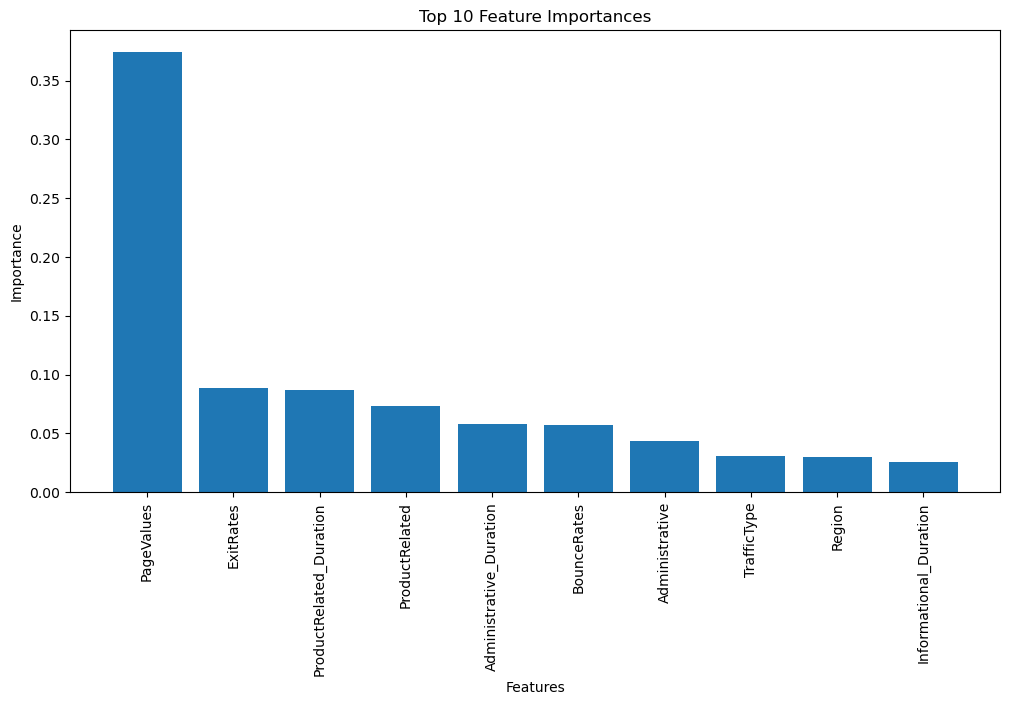

2024/11/17 15:00:12 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/11/17 15:01:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2024/11/17 15:01:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run nimble-ray-122 at: http://131.247.92.12:5014/#/experiments/1/runs/bd34d19ab71f4ae899c59e45fdf63e0b.
2024/11/17 15:01:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 15:01:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run spiffy-whale-543 at: http://131.247.92.12:5014/#/experiments/1/runs/73c09d808ce34efa87befead13579077.
2024/11/17 15:01:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 15:01:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-pig-51 at: http://131.247.92.12:50

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC score during CV: 0.6637894081461194

Random Forest Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3127
        True       0.74      0.55      0.63       572

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score: 0.7556928600660612


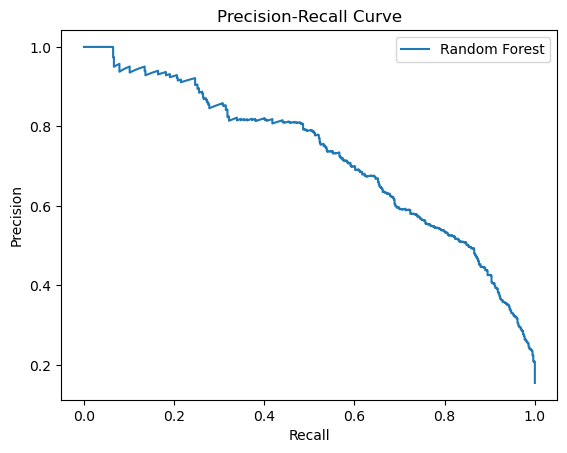

2024/11/17 15:01:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest - Final at: http://131.247.92.12:5014/#/experiments/1/runs/5ad4a3c47cc54a6e997165252162dddf.
2024/11/17 15:01:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


Autolog Run ID: 5ad4a3c47cc54a6e997165252162dddf


In [15]:

mlflow.sklearn.autolog()

# Create and train the model
with mlflow.start_run(run_name="Random Forest - Final") as run:
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Get feature importances
    importances = rf_model.feature_importances_
    feature_names = X.columns

    # Creating a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display top 10 features
    print("Top 10 Important Features:")
    print(feature_importance_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top 10 Feature Importances')
    plt.xticks(rotation=90)
    plt.show()

    param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_dist, cv=5, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best ROC AUC score during CV:", grid_search.best_score_)

    best_rf_model = grid_search.best_estimator_
    y_pred_rf = best_rf_model.predict(X_test)

    print("\nRandom Forest Results after Hyperparameter Tuning:")
    print(classification_report(y_test, y_pred_rf))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

    precision, recall, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label='Random Forest')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Get the run ID
    autolog_run_id = run.info.run_id

print(f"Autolog Run ID: {autolog_run_id}")    

## Random Forest with SMOTE

2024/11/17 15:08:31 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/17 15:08:31 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/17 15:08:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/17 15:08:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 15:08:38 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/11/17 15:10:54 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC score during CV: 0.9352203031561898

Random Forest Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      3127
        True       0.62      0.70      0.66       572

    accuracy                           0.89      3699
   macro avg       0.78      0.81      0.80      3699
weighted avg       0.89      0.89      0.89      3699

ROC AUC Score: 0.8104007840576437


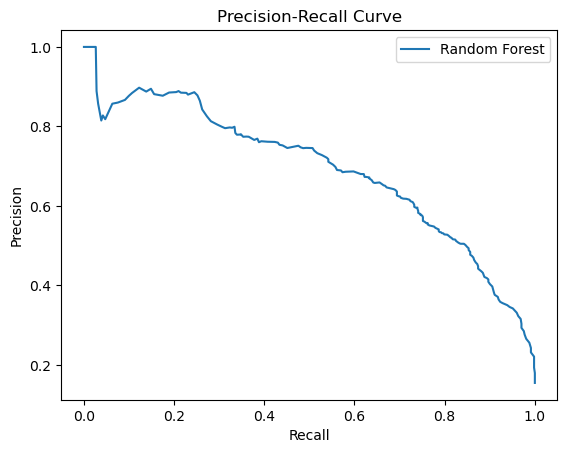

2024/11/17 15:10:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest - 4 at: http://131.247.92.12:5014/#/experiments/1/runs/b5e0ddc3a0f94abbad49299360d6234e.
2024/11/17 15:10:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


Autolog Run ID: b5e0ddc3a0f94abbad49299360d6234e


In [16]:
mlflow.sklearn.autolog()

# Create and train the model
with mlflow.start_run(run_name="Random Forest - 4") as run:
    param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_dist, cv=5, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)

    print("Best parameters:", grid_search.best_params_)
    print("Best ROC AUC score during CV:", grid_search.best_score_)

    best_rf_model = grid_search.best_estimator_
    y_pred_rf = best_rf_model.predict(X_test)

    print("\nRandom Forest Results after Hyperparameter Tuning:")
    print(classification_report(y_test, y_pred_rf))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

    precision, recall, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label='Random Forest')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    
    # Get the run ID
    autolog_run_id = run.info.run_id

print(f"Autolog Run ID: {autolog_run_id}")     

# Model 3 - Decision Tree

2024/11/17 13:32:19 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 5 folds for each of 30 candidates, totalling 150 fits


2024/11/17 13:32:33 INFO mlflow.sklearn.utils: Logging the 5 best runs, 25 runs will be omitted.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run capable-calf-721 at: http://131.247.92.12:5014/#/experiments/1/runs/fe0df9656e364b65bdf3ceb04f9151bf.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run big-cow-23 at: http://131.247.92.12:5014/#/experiments/1/runs/bfb4a434280c40ca9446431bee76d8c3.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run burly-hog-917 at: http://131.247.92.12:5014/#/experiments/1/runs/c17c342279c8492fbbba5097e367988a.
2024/11/17 13:32:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.1

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.9025340322142158
Best ROC AUC score during CV: 0.9025340322142158
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)
              precision    recall  f1-score   support

       False       0.94      0.90      0.92      3127
        True       0.55      0.69      0.61       572

    accuracy                           0.87      3699
   macro avg       0.75      0.79      0.76      3699
weighted avg       0.88      0.87      0.87      3699

ROC AUC Score: 0.8104007840576437


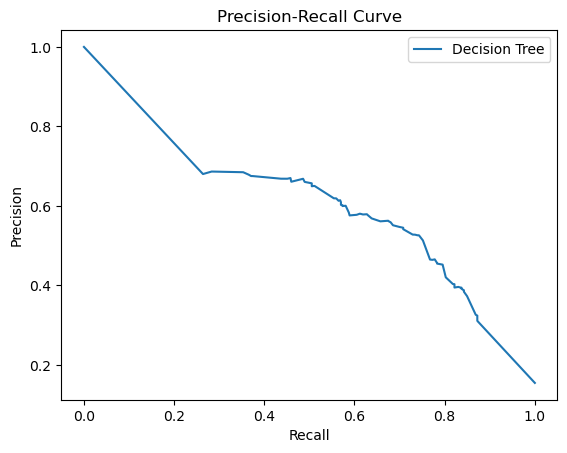

2024/11/17 13:32:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision_Tree at: http://131.247.92.12:5014/#/experiments/1/runs/eee47147b4734dab9fbbd2b6bdfe55eb.
2024/11/17 13:32:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


In [ ]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name = "Decision_Tree" ):
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(4, 12, 3),
    'min_samples_split': range(10, 20, 11),
    'min_samples_leaf': [3, 4, 5, 7, 9]
    }
    
    f1_scorer = make_scorer(f1_score, average='weighted')
    
    # create a grid search object
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring=f1_scorer)
    
    # fit the grid search object to the data
    grid_search.fit(X_train, y_train)
    
    # print the best hyperparameters
    print("Best parameters:", grid_search.best_params_)
    
    # print the best score
    print(grid_search.best_score_)
    dt_best = grid_search.best_score_
    print("Best ROC AUC score during CV:", grid_search.best_score_)
    
    # print estimate details
    print(grid_search.best_estimator_)
    
    # save the best model
    best_dt_model = grid_search.best_estimator_
    
    # save the f1 score of the best model
    y_pred_dt = best_dt_model.predict(X_test)
    
    print(classification_report(y_test, y_pred_dt))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

    precision, recall, _ = precision_recall_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label='Decision Tree')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()    

mlflow.end_run()

## Decision Tree with SMOTE sampling

In [ ]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name = "Decision_Tree_SMOTE_Resampling" ):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(4, 12, 3),
        'min_samples_split': range(10, 20, 11),
        'min_samples_leaf': [3, 4, 5]
    }

    smote = SMOTE(random_state=42)
    X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

    f1_scorer = make_scorer(f1_score, average='weighted')
    
    # create a grid search object
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring=f1_scorer)
    
    # fit the grid search object to the data
    grid_search.fit(X_res_smote, y_res_smote)
    
    # print the best hyperparameters
    print(grid_search.best_params_)
    
    # print the best score
    print(grid_search.best_score_)
    dt_best = grid_search.best_score_
    
    # print estimate details
    print(grid_search.best_estimator_)
    
    # save the best model
    best_dt_model = grid_search.best_estimator_
    
    # save the f1 score of the best model
    y_pred_dt = best_dt_model.predict(X_test)
    f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
    print(f1_dt)
    dt_f1_score = f1_dt
    
    #accuracy_dt = accuracy_score(y_test, y_pred_dt)
    #precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    #recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

    print(classification_report(y_test, y_pred_dt))
mlflow.end_run()

2024/11/17 13:32:55 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 5 folds for each of 18 candidates, totalling 90 fits


2024/11/17 13:33:07 INFO mlflow.sklearn.utils: Logging the 5 best runs, 13 runs will be omitted.
2024/11/17 13:33:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run persistent-lamb-618 at: http://131.247.92.12:5014/#/experiments/1/runs/3acddc453742401190330b8c8c229c86.
2024/11/17 13:33:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:33:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run sneaky-moose-384 at: http://131.247.92.12:5014/#/experiments/1/runs/9404fc47a1714a0487267952b40f87a2.
2024/11/17 13:33:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:33:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run mysterious-wren-23 at: http://131.247.92.12:5014/#/experiments/1/runs/78581a1550084291b783381876c0e3c2.
2024/11/17 13:33:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.9029583877896261
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=10)
0.8727046066173711
              precision    recall  f1-score   support

       False       0.94      0.90      0.92      3127
        True       0.55      0.70      0.62       572

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



2024/11/17 13:33:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision_Tree_SMOTE_Resampling at: http://131.247.92.12:5014/#/experiments/1/runs/6ce4b9baf5214addb493dedb4d2619c9.
2024/11/17 13:33:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


## Decision Tree with ADASYN

In [ ]:

mlflow.sklearn.autolog()

with mlflow.start_run(run_name = "Decision_Tree_ADASYN_Resampling" ):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(4, 12, 3),
        'min_samples_split': range(10, 20, 11),
        'min_samples_leaf': [3, 4, 5]
    }

    adasyn = ADASYN(random_state=42)
    X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train, y_train)

    f1_scorer = make_scorer(f1_score, average='weighted')
    
    # create a grid search object
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring=f1_scorer)
    
    # fit the grid search object to the data
    grid_search.fit(X_res_adasyn, y_res_adasyn)
    
    # print the best hyperparameters
    print(grid_search.best_params_)
    
    # print the best score
    print(grid_search.best_score_)
    dt_best = grid_search.best_score_
    
    # print estimate details
    print(grid_search.best_estimator_)
    
    # save the best model
    best_dt_model = grid_search.best_estimator_
    
    # save the f1 score of the best model
    y_pred_dt = best_dt_model.predict(X_test)
    f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
    print(f1_dt)
    dt_f1_score = f1_dt
    
    #accuracy_dt = accuracy_score(y_test, y_pred_dt)
    #precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    #recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
    
    print(classification_report(y_test, y_pred_dt))

mlflow.end_run()

2024/11/17 13:33:25 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 5 folds for each of 18 candidates, totalling 90 fits


2024/11/17 13:33:37 INFO mlflow.sklearn.utils: Logging the 5 best runs, 13 runs will be omitted.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run classy-asp-785 at: http://131.247.92.12:5014/#/experiments/1/runs/f6f310fe788d43c7a693466e2fd9abb7.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-mink-25 at: http://131.247.92.12:5014/#/experiments/1/runs/7d8123185064487485da6b24ba455c12.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run secretive-mole-434 at: http://131.247.92.12:5014/#/experiments/1/runs/46f8567b2db94ec6817bbeefce5160cc.
2024/11/17 13:33:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.9025594013818218
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=10)
0.87218819528519
              precision    recall  f1-score   support

       False       0.94      0.90      0.92      3127
        True       0.55      0.70      0.62       572

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



2024/11/17 13:33:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision_Tree_ADASYN_Resampling at: http://131.247.92.12:5014/#/experiments/1/runs/0cc84c1a991543a087f51a1c94ac730b.
2024/11/17 13:33:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


___________


# Model 4 - MLP

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      3127
           1       0.69      0.56      0.62       572

    accuracy                           0.89      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



2024/11/17 12:18:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run MLP_run_tuning_W_strsplit at: http://131.247.92.12:5014/#/experiments/2/runs/11cbca91fd4a4f5db49d4b469a4c4a43.
2024/11/17 12:18:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/2.


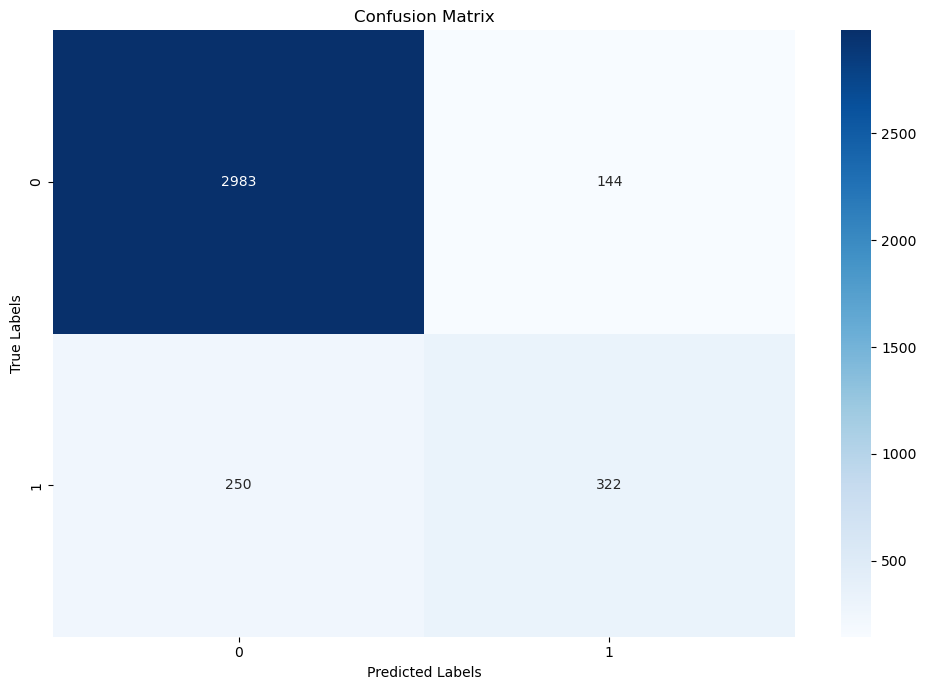

In [ ]:
# Hyperparameters
param_grid = {
    'hidden_layer_sizes': [(60, 50, 40), (80, 70, 60), (100, 100, 100)], 
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'max_iter': [200, 300, 400],  # Increased max_iter
    'learning_rate_init': [0.001, 0.01, 0.1],  
    'early_stopping': [True],  # Enable early stopping for faster convergence
}

# Define MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Start MLflow run
with mlflow.start_run(run_name="MLP_run_tuning_W_strsplit"):
    mlflow.log_param("Grid_Search_Param_Grid", str(param_grid))

    # Fit the model with GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Log best parameters
    mlflow.log_param("Best_Hyperparameters", grid_search.best_params_)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1_Score", f1)
    mlflow.log_metric("ROC_AUC_Score", roc_auc)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.tight_layout()

    # Save confusion matrix plot
    confusion_matrix_image = "/tmp/confusion_matrix.png"
    plt.savefig(confusion_matrix_image)
    mlflow.log_artifact(confusion_matrix_image)

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


## MLP with SMOTE

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.001, max_iter=200, solver=adam; total time=   1.5s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.5s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.5s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   3.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.01, max_iter=200, solver=adam; total time=   1.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_rate_init=0.01, max_iter=200, solver=adam; total time=   0.8s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=(60, 50, 40), learning_ra

2024/11/17 13:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 13:30:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 13:30:47 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2024/11/17 13:30:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run capable-stoat-532 at: http://131.247.92.12:5014/#/experiments/2/runs/8241b6bd03114d038a9dbefebd57c7c8.
2024/11/17 13:30:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/2.
2024/11/17 13:30:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run loud-stork-557 at: http://131.247.92.12:5014/#/experiments/2/runs/06b6784d97f745ad97ab80baac07a365.
2024/11/17 13:30:49

Best Parameters: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}
Best F1-Weighted Score: 0.9215651124142425
Accuracy: 0.86
Precision: 0.88
Recall: 0.86
F1 Score: 0.87
ROC AUC Score: 0.89
Accuracy for Class 0 (Non-Purchase): 0.89
Accuracy for Class 1 (Purchase): 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      3127
           1       0.55      0.71      0.62       572

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.77      3699
weighted avg       0.88      0.86      0.87      3699



2024/11/17 13:30:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run MLP_with_SMOTE_W_StrSplit_tuned at: http://131.247.92.12:5014/#/experiments/2/runs/b517fc43dca74da28066ce9cd9809b75.
2024/11/17 13:30:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/2.


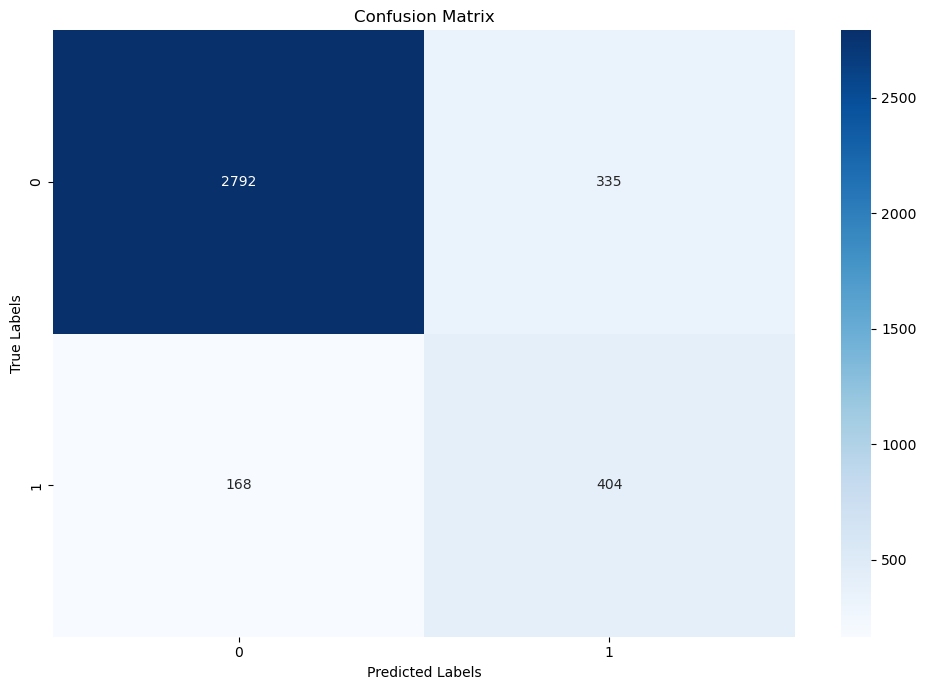

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Log parameters and model with MLflow
mlflow.sklearn.autolog(log_input_examples=False, log_model_signatures=False, log_datasets=False)  # Disable dataset logging

# Hyperparameters
param_grid = {
    'hidden_layer_sizes': [(60, 50, 40), (80, 70, 60), (100, 100, 100)], 
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'max_iter': [200, 300, 400],  # Increased max_iter
    'learning_rate_init': [0.001, 0.01, 0.1],  
    'early_stopping': [True],  # Enable early stopping for faster convergence
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='f1_weighted', cv=5)

# Start MLflow run
with mlflow.start_run(run_name="MLP_with_SMOTE_W_StrSplit_tuned"):
    grid_search.fit(X_train_res, y_train_res)
    
    # Get best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best F1-Weighted Score: {best_score}")
    
    # Make predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy_class_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Non-Purchase accuracy
    accuracy_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # Purchase accuracy
    
    # Log metrics to MLflow
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1_Score", f1)
    mlflow.log_metric("ROC_AUC_Score", roc_auc)
    mlflow.log_metric("Accuracy_Class_0_Non_Purchase", accuracy_class_0)
    mlflow.log_metric("Accuracy_Class_1_Purchase", accuracy_class_1)
    
    # Log confusion matrix plot as artifact
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    
    # Save the plot as an artifact
    confusion_matrix_image = "/tmp/confusion_matrix.png"
    plt.savefig(confusion_matrix_image)
    mlflow.log_artifact(confusion_matrix_image)
    
    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Accuracy for Class 0 (Non-Purchase): {accuracy_class_0:.2f}")
    print(f"Accuracy for Class 1 (Purchase): {accuracy_class_1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Model 5 - SVM

2024/11/17 15:54:21 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2024/11/17 16:05:16 INFO mlflow.sklearn.utils: Logging the 5 best runs, 20 runs will be omitted.
2024/11/17 16:05:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run sincere-bird-112 at: http://131.247.92.12:5014/#/experiments/1/runs/f9bbc6a1997b4c558660f02a13457eef.
2024/11/17 16:05:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:05:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run bright-zebra-390 at: http://131.247.92.12:5014/#/experiments/1/runs/447a2ab7eb8e4559a4c7e8e1e73e29d0.
2024/11/17 16:05:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:05:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-zebra-667 at: http://131.247.92.12:5014/#/experiments/1/runs/3f8d40231bb14735a0de1da25e6aa825.
2024/11/17 16:05:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://1


Classification Report SVM:

              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3127
        True       0.57      0.74      0.64       572

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699



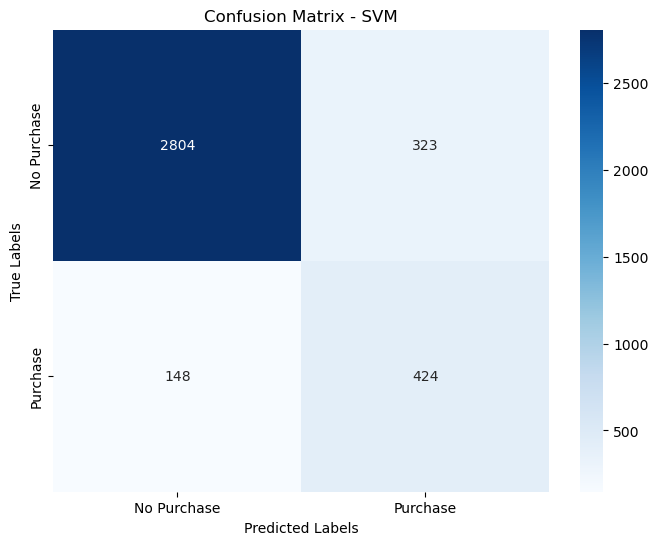

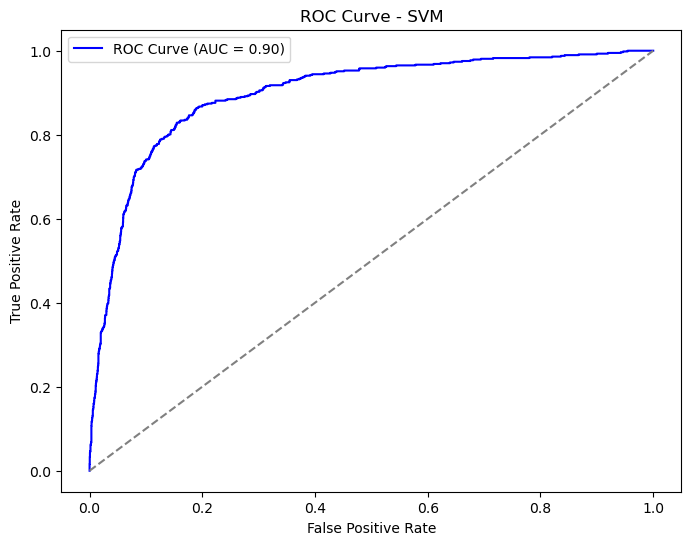

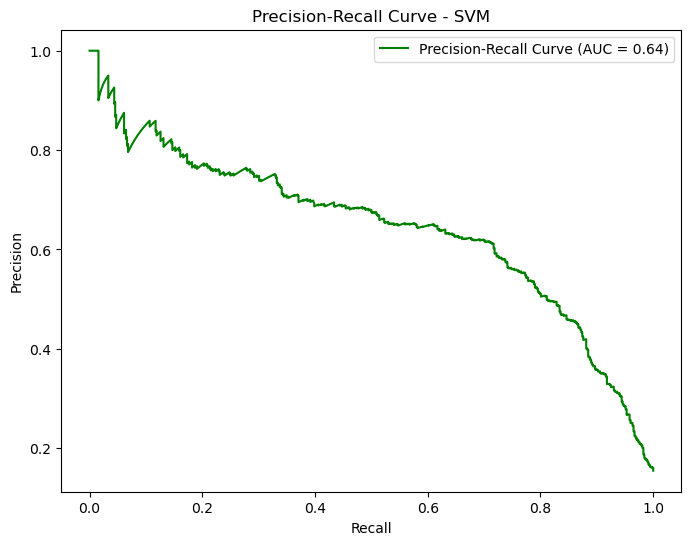

2024/11/17 16:05:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM at: http://131.247.92.12:5014/#/experiments/1/runs/f171256c0e4d4cf89ef23038c16c4eca.
2024/11/17 16:05:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


In [19]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the SVM model with fixed kernel and class weight
svc = SVC(class_weight='balanced', kernel='rbf', probability=True)

# Perform grid search with MLflow
with mlflow.start_run(run_name="SVM"):
    # GridSearchCV setup
    grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=5, scoring='f1', verbose=1, n_jobs=-1)
    grid_search_svm.fit(X_train, y_train)

    # Extract the best model and make predictions
    best_svm = grid_search_svm.best_estimator_
    y_pred_svm = best_svm.predict(X_test)
    y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

    # Classification report
    print("\nClassification Report SVM:\n")
    print(classification_report(y_test, y_pred_svm))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title("Confusion Matrix - SVM")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("confusion_matrix_SVM.png")
    mlflow.log_artifact("confusion_matrix_SVM.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], 'r--', color="gray")
    plt.title("ROC Curve - SVM")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig("roc_curve_SVM.png")
    mlflow.log_artifact("roc_curve_SVM.png")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
    plt.title("Precision-Recall Curve - SVM")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig("precision_recall_curve_SVM.png")
    mlflow.log_artifact("precision_recall_curve_SVM.png")
    plt.show()

## SVM with SMOTE

2024/11/17 16:06:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f98233e4a8834994b4edf2aac79015dd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/17 16:06:11 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/17 16:06:11 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/17 16:06:11 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/17 16:06:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

Fitting 5 folds for each of 25 candidates, totalling 125 fits


2024/11/17 16:21:36 INFO mlflow.sklearn.utils: Logging the 5 best runs, 20 runs will be omitted.
2024/11/17 16:21:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run amusing-shrimp-362 at: http://131.247.92.12:5014/#/experiments/1/runs/49211c8a6c57474e9366d5a373019712.
2024/11/17 16:21:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:21:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-gnu-346 at: http://131.247.92.12:5014/#/experiments/1/runs/6a435e1b9e424524b5c2e7b8deb1df05.
2024/11/17 16:21:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:21:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run bustling-colt-61 at: http://131.247.92.12:5014/#/experiments/1/runs/9d7ae7cfdc0e482b9a8b58e531f651f7.
2024/11/17 16:21:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://13


Classification Report SVM:

              precision    recall  f1-score   support

       False       0.87      0.96      0.91      3127
        True       0.45      0.19      0.26       572

    accuracy                           0.84      3699
   macro avg       0.66      0.57      0.59      3699
weighted avg       0.80      0.84      0.81      3699



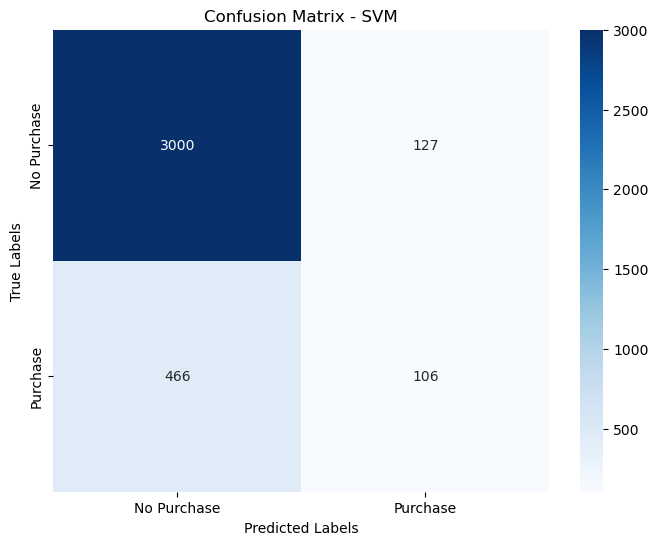

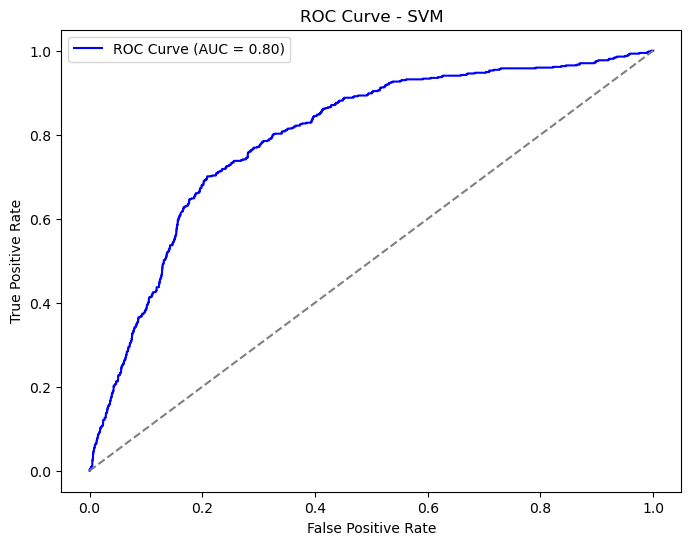

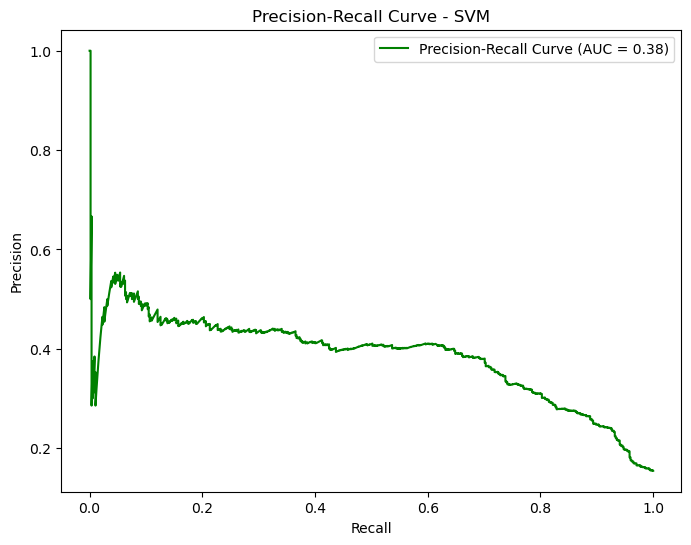

2024/11/17 16:21:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM at: http://131.247.92.12:5014/#/experiments/1/runs/fc94943c456f40ea9553f741c8616111.
2024/11/17 16:21:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


In [20]:
smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the SVM model with fixed kernel and class weight
svc = SVC(kernel='rbf', probability=True)

# Perform grid search with MLflow
with mlflow.start_run(run_name="SVM"):
    # GridSearchCV setup
    grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=5, scoring='f1', verbose=1, n_jobs=-1)
    grid_search_svm.fit(X_train_smo, y_train_smo)

    # Extract the best model and make predictions
    best_svm = grid_search_svm.best_estimator_
    y_pred_svm = best_svm.predict(X_test)
    y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

    # Classification report
    print("\nClassification Report SVM:\n")
    print(classification_report(y_test, y_pred_svm))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title("Confusion Matrix - SVM")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("confusion_matrix_SVM.png")
    mlflow.log_artifact("confusion_matrix_SVM.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], 'r--', color="gray")
    plt.title("ROC Curve - SVM")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig("roc_curve_SVM.png")
    mlflow.log_artifact("roc_curve_SVM.png")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
    plt.title("Precision-Recall Curve - SVM")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig("precision_recall_curve_SVM.png")
    mlflow.log_artifact("precision_recall_curve_SVM.png")
    plt.show()

## Model 6 - XGBOOST

2024/11/17 16:26:28 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 5 folds for each of 108 candidates, totalling 540 fits


2024/11/17 16:26:58 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2024/11/17 16:27:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run welcoming-shark-681 at: http://131.247.92.12:5014/#/experiments/1/runs/8560ed66461945f1a0b05d16d13bd69f.
2024/11/17 16:27:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:27:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run auspicious-rook-72 at: http://131.247.92.12:5014/#/experiments/1/runs/8d8a696ae3d041e8b6ca6ecc1d573f71.
2024/11/17 16:27:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:27:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-shad-511 at: http://131.247.92.12:5014/#/experiments/1/runs/cca5a0e3a32b4cb18044683af58fc83b.
2024/11/17 16:27:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http


Classification Report XGBoost:

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3127
        True       0.71      0.58      0.64       572

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



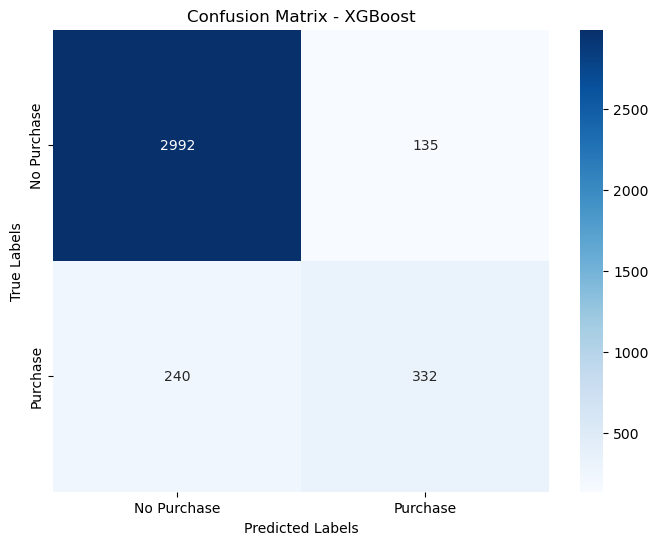

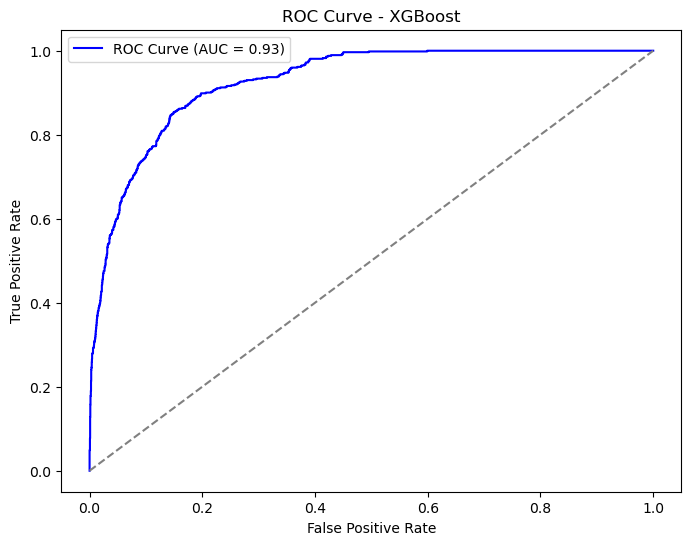

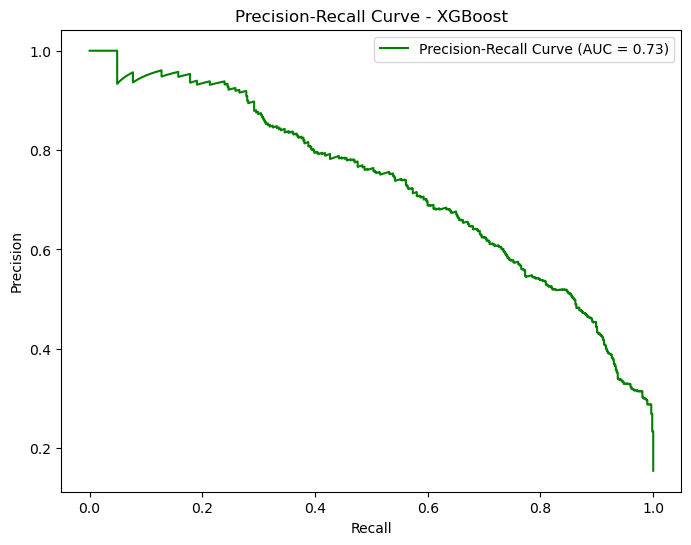

2024/11/17 16:27:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://131.247.92.12:5014/#/experiments/1/runs/23c8a7a82d714321803e110f0f11b7a9.
2024/11/17 16:27:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


In [22]:
mlflow.xgboost.autolog()

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search with MLflow
with mlflow.start_run(run_name="XGBoost"):
    # GridSearchCV setup
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Extract the best model and make predictions
    best_xg_model = grid_search.best_estimator_
    y_pred_xgb = best_xg_model.predict(X_test)
    y_pred_proba = best_xg_model.predict_proba(X_test)[:, 1]

    # Classification report
    print("\nClassification Report XGBoost:\n")
    print(classification_report(y_test, y_pred_xgb))

    # Confusion matrix
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title("Confusion Matrix - XGBoost")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("confusion_matrix_XGBoost.png")
    mlflow.log_artifact("confusion_matrix_XGBoost.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title("ROC Curve - XGBoost")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig("roc_curve_XGBoost.png")
    mlflow.log_artifact("roc_curve_XGBoost.png")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
    plt.title("Precision-Recall Curve - XGBoost")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig("precision_recall_curve_XGBoost.png")
    mlflow.log_artifact("precision_recall_curve_XGBoost.png")
    plt.show()

## XGBoost with SMOTE

2024/11/17 16:28:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5797976707a44ae9b6c20ce727a84ec5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/17 16:28:52 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/17 16:28:52 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/17 16:28:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/17 16:28:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

Fitting 5 folds for each of 108 candidates, totalling 540 fits


2024/11/17 16:29:39 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run wistful-zebra-886 at: http://131.247.92.12:5014/#/experiments/1/runs/2a810e4cd9c848bb8a1188a0b5dfb369.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-moose-803 at: http://131.247.92.12:5014/#/experiments/1/runs/3e3832254f144953ac9d0c6d1814440f.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run unruly-vole-403 at: http://131.247.92.12:5014/#/experiments/1/runs/fbc79ea183c34b7594bb8e31f0375948.
2024/11/17 16:29:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http:/


Classification Report XGBoost:

              precision    recall  f1-score   support

       False       0.94      0.93      0.93      3127
        True       0.63      0.69      0.66       572

    accuracy                           0.89      3699
   macro avg       0.79      0.81      0.80      3699
weighted avg       0.89      0.89      0.89      3699



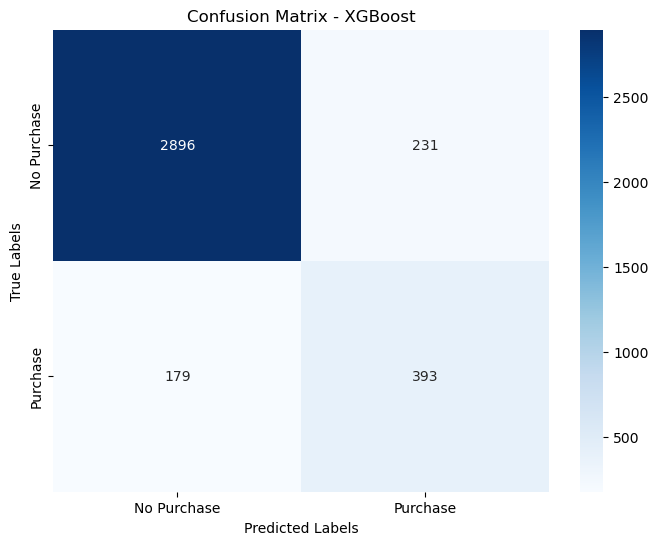

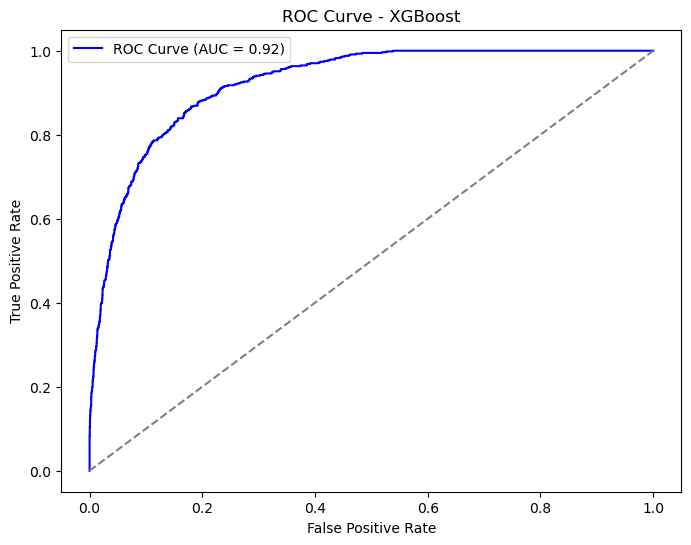

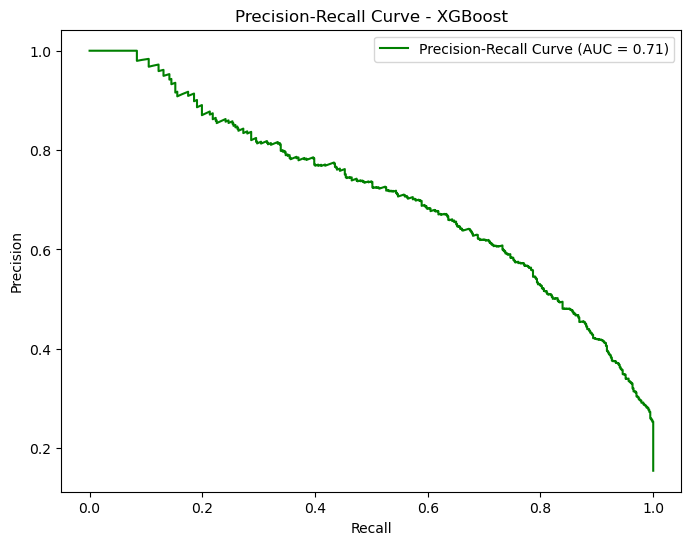

2024/11/17 16:29:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://131.247.92.12:5014/#/experiments/1/runs/be744484eec24efaa126bcb03810521c.
2024/11/17 16:29:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5014/#/experiments/1.


In [23]:
mlflow.xgboost.autolog()

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

smote = SMOTE(random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search with MLflow
with mlflow.start_run(run_name="XGBoost"):
    # GridSearchCV setup
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_smo, y_train_smo)

    # Extract the best model and make predictions
    best_xg_model = grid_search.best_estimator_
    y_pred_xgb = best_xg_model.predict(X_test)
    y_pred_proba = best_xg_model.predict_proba(X_test)[:, 1]

    # Classification report
    print("\nClassification Report XGBoost:\n")
    print(classification_report(y_test, y_pred_xgb))

    # Confusion matrix
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title("Confusion Matrix - XGBoost")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("confusion_matrix_XGBoost.png")
    mlflow.log_artifact("confusion_matrix_XGBoost.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title("ROC Curve - XGBoost")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig("roc_curve_XGBoost.png")
    mlflow.log_artifact("roc_curve_XGBoost.png")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
    plt.title("Precision-Recall Curve - XGBoost")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig("precision_recall_curve_XGBoost.png")
    mlflow.log_artifact("precision_recall_curve_XGBoost.png")
    plt.show()

### Best model

 - After reviewing all the models, we found that the **XGBoost model without SMOTE** stood out as the best option for predicting which online shoppers are likely to make a purchase. This model achieved the highest **F1-score (0.64)** for the purchasing class, which tells us it maintains a good mix of both recall and precision. Essentially, the model does a solid job of correctly identifying customers who are likely to buy without generating too many false positives. This balance is crucial for our goals, it helps make sure that our marketing resources are used effectively without being wasted.

 - For an e-commerce business, having a model that can accurately identify potential customers is extremely valuable. The XGBoost model helps us do just that, minimizing the risk of missing out on potential buyers while also not over-targeting those unlikely to purchase. By making sure that marketing campaigns focus on real opportunities, the model can help increase sales and reduce unnecessary spending. In short, the **XGBoost without SMOTE** model is well-positioned to support smarter marketing decisions, leading to better conversions and revenue growth for the business.

### Effectiveness of Using SMOTE on Stratified Split
 - In our case, applying **SMOTE on top of Stratified Split** provided some improvements in model performance, particularly for the minority class (`Revenue = TRUE`). By generating synthetic samples for the purchasing class, SMOTE helped the models learn more effectively from the limited data points available for this class, thereby increasing recall and ensuring that potential buyers were better captured. 

 - However, the trade-off was an increase in false positives in some models, resulting in lower precision. This suggests that while SMOTE helped reduce the issue of missed opportunities (i.e., false negatives), it also introduced some unnecessary predictions. 

 - The decision on whether SMOTE is truly helpful depends on the specific business context—if minimizing missed buyers is prioritized over avoiding wasted marketing resources, then using SMOTE can be seen as beneficial. 
 
 - In our analysis, we found that the balance achieved by certain models, such as XGBoost without SMOTE, was ultimately better for ensuring both accurate targeting and efficient use of resources.

# Comparison with the reference paper
 - The outcomes of our model closely align with the findings presented in the paper "Real-time prediction of online shoppers' purchasing intention using multilayer perceptron and LSTM recurrent neural networks" by C. Okan Sakar et al. Both our study and the referenced paper emphasize the importance of using oversampling techniques and feature selection to manage imbalanced datasets effectively, which ultimately enhances prediction accuracy and F1 score. 
 - By incorporating SMOTE for oversampling and applying thoughtful feature engineering, we achieved more balanced classification rates, similar to the paper's results, where aggregated clickstream and session features significantly improved model performance. 
 - The paper found that the MLP classifier, using a resilient backpropagation algorithm, achieved the highest accuracy, and our results similarly showed strong performance with MLP when dealing with imbalanced data. This consistency highlights the reliability of neural networks for predicting online purchasing behavior in e-commerce environments.

 - In our analysis, the **XGBoost model without SMOTE** came out as the top performer, achieving an **F1-score of 0.64**, a **precision of 0.71**, and a **recall of 0.58** for identifying purchasing sessions. These metrics show that XGBoost struck a solid balance between precision and recall, outperforming other models by efficiently identifying purchasing customers while avoiding an excessive number of false positives. 
 - Compared to the results in the paper, where the MLP model delivered the highest accuracy, our XGBoost model showed a similarly strong level of classification effectiveness, highlighting the versatility of ensemble methods in tackling e-commerce prediction challenges. 
 - This demonstrates that both neural network models and ensemble methods like XGBoost can be effective for predicting online shoppers' purchase intentions, depending on the specific balance between precision and recall that aligns best with business objectives.

## Recommendations

 - _Targeted Marketing Campaigns:_ Based on our model's ability to accurately predict potential buyers, the business can use these predictions to create targeted marketing campaigns. By focusing marketing efforts and promotional incentives on users who are predicted to make a purchase, the business can increase conversion rates while reducing unnecessary advertising spend on users unlikely to buy.

 - _Personalized Customer Experience:_ The features identified as important by our models, such as "Product Related Duration" and "Page Value," can be used to personalize the shopping experience. By emphasizing these features, the business can tailor product recommendations, website layouts, or promotions in real time, ultimately creating a more engaging shopping experience that is likely to lead to increased sales and customer satisfaction.

# Conclusion

 - In conclusion, our project shows that machine learning models can play a crucial role in predicting whether online shoppers are likely to make a purchase, especially when we employ thoughtful data balancing and feature engineering strategies.
 - Out of all the models we tested, the XGBoost model without SMOTE stood out, achieving a strong balance between precision and recall, making it a practical solution for e-commerce businesses aiming to identify potential customers effectively.
 - This model's performance highlights its reliability in capturing both the opportunities to convert genuine buyers and reducing false alarms, ultimately making marketing campaigns more efficient.

 - Moreover, our findings align well with the referenced study, reinforcing that both neural networks and ensemble methods are highly effective for tackling prediction problems involving imbalanced datasets. This versatility suggests a promising path for improving personalized marketing and customer engagement. By leveraging machine learning, businesses can make better data-driven decisions to enhance customer targeting, reduce unnecessary marketing expenses, and boost sales performance.